In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

0: airplane 1: automobile 2: bird 3: cat 4: deer 5: dog 6: frog 7: horse 8: ship 9: truck

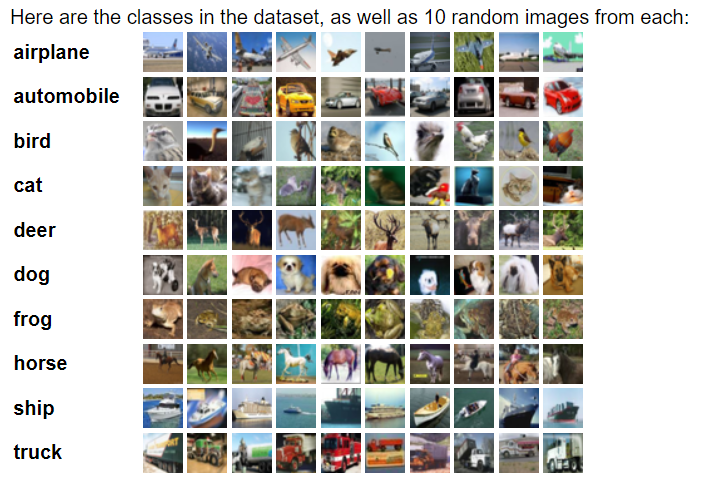

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


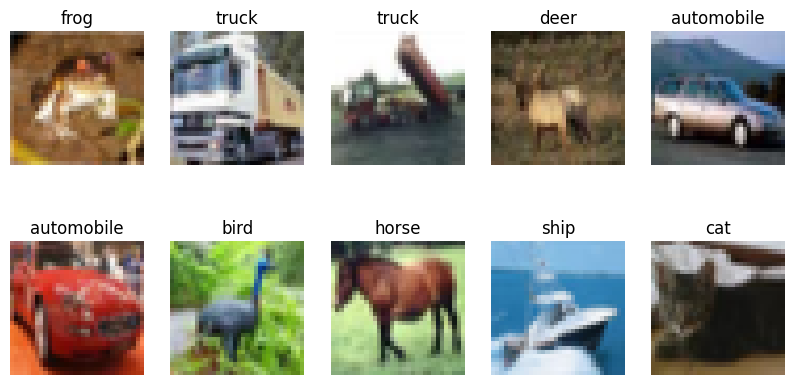

In [ ]:


# Visualize a few images from the training dataset
def plot_images(images, labels, classes):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_images(x_train, y_train, class_names)

In [ ]:
# Create a Sequential model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model on the training data
num_epochs = 10
batch_size = 64

history = model.fit(x_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.2612 - loss: 2.0390 - val_accuracy: 0.3629 - val_loss: 1.7505
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.3781 - loss: 1.7226 - val_accuracy: 0.4005 - val_loss: 1.6722
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.4176 - loss: 1.6147 - val_accuracy: 0.4235 - val_loss: 1.6171
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4453 - loss: 1.5475 - val_accuracy: 0.4445 - val_loss: 1.5607
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4609 - loss: 1.5021 - val_accuracy: 0.4493 - val_loss: 1.5401
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.4728 - loss: 1.4701 - val_accuracy: 0.4517 - val_loss: 1.5334
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4835 - loss: 1.4404 - val_accuracy: 0.4552 - val_loss: 1.5398
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4961 - loss: 1.4059 - 

In [ ]:

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.4754 - loss: 1.4826

Test accuracy: 0.47540000081062317


In [ ]:


# Predict on a few random test images
num_images_to_predict = 5
random_indices = np.random.randint(0, len(x_test), size=num_images_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


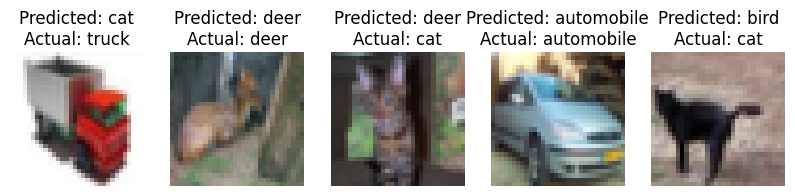

In [ ]:

test_images = x_test[random_indices]
predicted_labels = model.predict(test_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Display the images along with the predicted classes and the actual classes
plt.figure(figsize=(10, 5))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[np.argmax(y_test[random_indices[i]])]}")
    plt.axis('off')
plt.show()